# CS522: Population Projection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('Populations.csv')

columns = [
    'Type',
    'Year',
    'Region, subregion, country or area *',
    'Total Population, as of 1 January (thousands)',
    'Population Density, as of 1 July (persons per square km)',
    'Population Sex Ratio, as of 1 July (males per 100 females)',
    'Median Age, as of 1 July (years)',
    'Natural Change, Births minus Deaths (thousands)',
    'Rate of Natural Change (per 1,000 population)',
    'Population Change (thousands)',
    'Population Growth Rate (percentage)',
    'Births (thousands)',
    'Births by women aged 15 to 19 (thousands)',
    'Crude Birth Rate (births per 1,000 population)',
    'Total Fertility Rate (live births per woman)',
    'Net Reproduction Rate (surviving daughters per woman)',
    'Mean Age Childbearing (years)',
    'Sex Ratio at Birth (males per 100 female births)',
    'Total Deaths (thousands)',
    'Male Deaths (thousands)',
    'Female Deaths (thousands)',
    'Crude Death Rate (deaths per 1,000 population)',
    'Life Expectancy at Birth, both sexes (years)',
    'Male Life Expectancy at Birth (years)',
    'Female Life Expectancy at Birth (years)',
    'Life Expectancy at Age 15, both sexes (years)',
    'Male Life Expectancy at Age 15 (years)',
    'Female Life Expectancy at Age 15 (years)',
    'Life Expectancy at Age 65, both sexes (years)',
    'Male Life Expectancy at Age 65 (years)',
    'Female Life Expectancy at Age 65 (years)',
    'Life Expectancy at Age 80, both sexes (years)',
    'Male Life Expectancy at Age 80 (years)',
    'Female Life Expectancy at Age 80 (years)',
    'Infant Deaths, under age 1 (thousands)',
    'Infant Mortality Rate (infant deaths per 1,000 live births)',
    'Live Births Surviving to Age 1 (thousands)',
    'Under-Five Deaths, under age 5 (thousands)',
    'Under-Five Mortality (deaths under age 5 per 1,000 live births)',
    'Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)',
    'Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)',
    'Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)',
    'Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)',
    'Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)',
    'Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)',
    'Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)',
    'Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)',
    'Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)',
    'Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)',
    'Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)',
    'Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)',
    'Net Number of Migrants (thousands)',
    'Net Migration Rate (per 1,000 population)'
]

def categorize_growth_rate(row):
    growth_rate = row['Population Growth Rate (percentage)']
    if growth_rate > 2:
        return 'High Growth'
    elif 0.5 < growth_rate <= 2:
        return 'Low Growth'
    elif -0.2 <= growth_rate <= 0.5:
        return 'Stagnant'
    else:
        return 'Decreasing'

class_data = data[columns]

class_data['Growth Category'] = class_data.apply(categorize_growth_rate, axis=1)

data = data[columns]
data = data[data['Type'] == 'Country/Area']

reordered_data = pd.DataFrame()

for year in range(1950, 2024):
    tmp = data[data['Year'] == year]
    reordered_data = pd.concat([reordered_data, tmp], ignore_index=True)

data = data.dropna()
reordered_data = reordered_data.dropna()

X = reordered_data.drop(['Region, subregion, country or area *', 'Type',
                         'Total Population, as of 1 January (thousands)'],
                        axis=1)

y = reordered_data['Total Population, as of 1 January (thousands)']

## Linear Regression

### World (shuffle)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, shuffle=True)

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'rmse: {rmse}')

rmse: 12691.342715555631


### World (no shuffle)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, shuffle=False)

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'rmse: {rmse}')

rmse: 14703.923566917294


### Single Country

rmse: 25.884419505723436


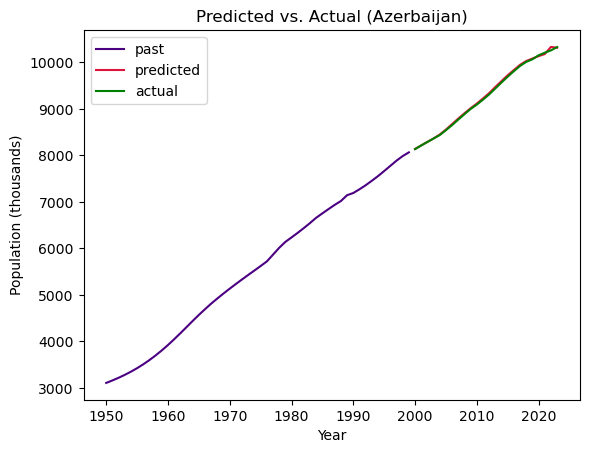

In [12]:
country = 'Azerbaijan'
year = 2000

single_country = reordered_data[reordered_data['Region, subregion, country or area *'] == country]

train = single_country[single_country['Year'] < year]
test = single_country[single_country['Year'] >= year]

X_train = train.drop(['Region, subregion, country or area *', 'Type',
                      'Total Population, as of 1 January (thousands)'],
                     axis=1)

X_test = test.drop(['Region, subregion, country or area *', 'Type',
                    'Total Population, as of 1 January (thousands)'],
                   axis=1)

y_train = train['Total Population, as of 1 January (thousands)']
y_test = test['Total Population, as of 1 January (thousands)']

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'rmse: {rmse}')

plt.plot(range(1950, year), y_train, color='indigo', label='past')
plt.plot(range(year, 2024), y_pred, color='crimson', label='predicted')
plt.plot(range(year, 2024), y_test, color='green', label='actual')
plt.title(f'Predicted vs. Actual ({country})')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()

### Single Country Future Projection

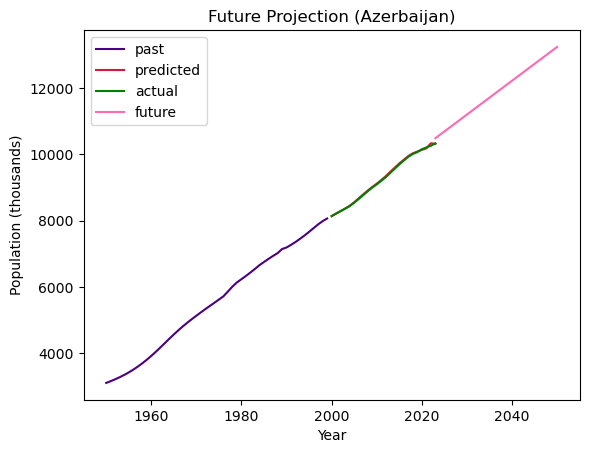

In [15]:
years = np.array(range(1950, 2024)).reshape(-1, 1)

train_ = single_country[single_country['Year'] <= 2023]
y_train_ = train_['Total Population, as of 1 January (thousands)']

clf = LinearRegression()
clf.fit(years, y_train_)

projection = np.array(range(2023, 2051)).reshape(-1, 1)
y_future = clf.predict(projection)

plt.plot(range(1950, year), y_train, color='indigo', label='past')
plt.plot(range(year, 2024), y_pred, color='crimson', label='predicted')
plt.plot(range(year, 2024), y_test, color='green', label='actual')
plt.plot(range(2023, 2051), y_future, color='hotpink', label='future')
plt.title(f'Future Projection ({country})')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()
plt.show()

## Classification

accuracy: 0.9984834698210494


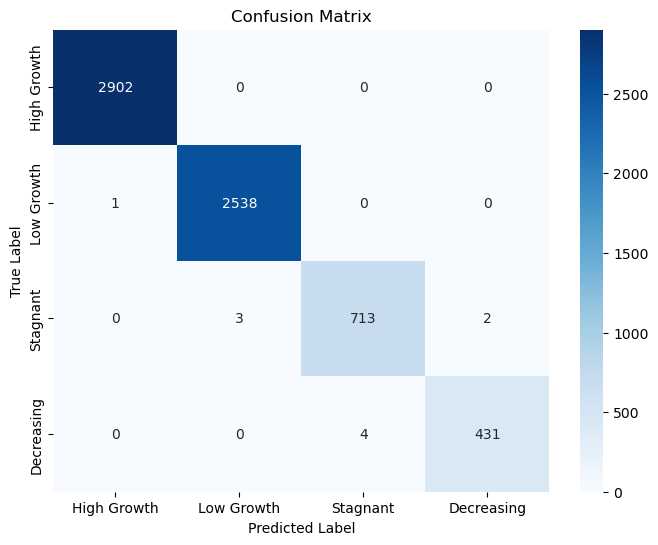

In [20]:
X = class_data.drop(['Region, subregion, country or area *', 'Type',
                         'Growth Category'],
                        axis=1)

y = class_data['Growth Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle=True)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print(f'accuracy: {accuracy}')

classes = ['High Growth', 'Low Growth', 'Stagnant', 'Decreasing']

cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### END